In [16]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
from matplotlib import gridspec
import numpy as np
from slab import SlabOut
import plot_chem
reload(plot_chem)
import cooling_utils as cu
reload(cu)
from matplotlib.colors import LogNorm

Text(0,0.5,u'$f_{H_2}$')

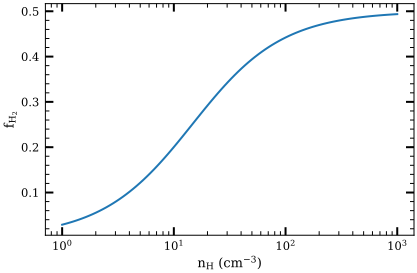

In [7]:
xx = np.logspace(0, 3, 100)
plt.plot(xx, cu.fH2_CR(xx))
plt.xscale("log")
plt.xlabel("$n_H\ (cm^{-3})$")
plt.ylabel("$f_{H_2}$")

In [9]:
dir_out = "/Users/munangong/chemistry_Athena/PDR_cvode/"

In [10]:
slab = SlabOut(dir_out+"out_x_e/") 
slab.ReadRates()
slab.ReadThermo()

Set xC=1.60e-04, xO=3.20e-04.
Calculating E assuming CvCold and xHe=0.1 ...


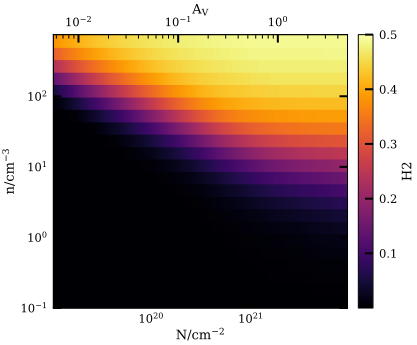

In [17]:
plot_chem.plot_abd(slab, "H2", vmax=0.5)

In [19]:
H2_cr = cu.fH2_CR(slab.nHM)

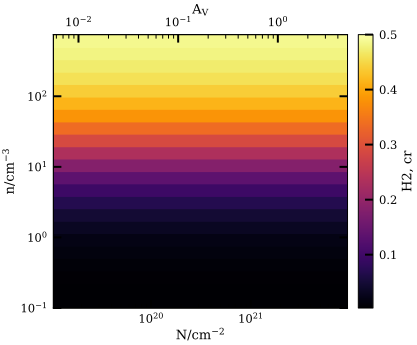

In [20]:
plot_chem.plot_abd(slab, "H2, cr", vmax=0.5, plot_field=H2_cr)

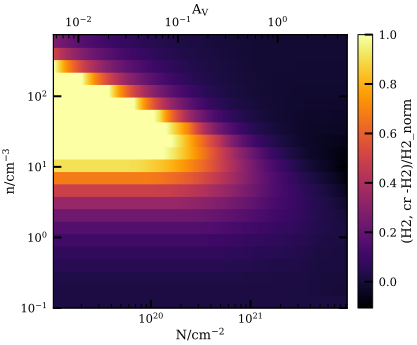

In [31]:
H2_min = 0.2
H2_norm = np.zeros(slab.abd["H2"].shape) + H2_min
indx = slab.abd["H2"] > H2_min
H2_norm[indx] = slab.abd["H2"][indx]
plot_chem.plot_abd(slab, "(H2, cr -H2)/H2_norm", vmax=1, plot_field=(H2_cr-slab.abd["H2"])/H2_norm)

The calculation of $f_{H_2}$ from CR is probably OK, since most error occurs at high density and low shielding regions, which is rare.